In [11]:
import shutil
import os
import kagglehub
import pandas as pd
from fastai.vision.all import Path
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [3]:
path_downloaded = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")
print("Path to dataset files:", path_downloaded)

source_folder = path_downloaded
destination_folder = "./fruits_vegetables"

try:
    shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)
    print(f"Folder copied successfully from {source_folder} to {destination_folder}")
except FileExistsError:
    print(f"The destination folder '{destination_folder}' already exists.")
except Exception as e:
    print(f"An error occurred: {e}")

Path to dataset files: C:\Users\elinf\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8
Folder copied successfully from C:\Users\elinf\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8 to ./fruits_vegetables


### Creating Paths

In [12]:
path = 'fruits_vegetables/'
path = Path(path)
print(path.ls())
trainPath = path/'train'
testPath = path/'test'
validatePath = path/'validation'

print(len(trainPath.ls()), len(testPath.ls()), len(validatePath.ls()))

[Path('fruits_vegetables/test'), Path('fruits_vegetables/train'), Path('fruits_vegetables/validation')]
36 36 36


In [13]:
folders_info = {}
for folder in path.ls():
    folders_info[folder.name] = {}
    for sub_folder in folder.ls():
        folders_info[folder.name][sub_folder.name] = len(sub_folder.ls())

folders_info_df = pd.DataFrame(folders_info)
folders_info_df["total_images"] = folders_info_df.sum(axis=1)
display(folders_info_df.head())  
total = folders_info_df[['train', 'validation', 'test']].sum().sum()

test_percentage = folders_info_df['test'].sum() / total
train_percentage = folders_info_df['train'].sum() / total
validation_percentage = folders_info_df['validation'].sum() / total

print(f"Test percentage: {test_percentage:.1%}")
print(f"Train percentage: {train_percentage:.1%}")
print(f"Validation percentage: {validation_percentage:.1%}")

percentage_sum = sum([test_percentage, train_percentage, validation_percentage])
print(f"Sum of percentages: {percentage_sum:.1f}")

,test,train,validation,total_images
apple,10,68,10,88
banana,9,75,9,93
beetroot,10,88,10,108
bell pepper,10,90,9,109
cabbage,10,92,10,112


Test percentage: 9.4%
Train percentage: 81.4%
Validation percentage: 9.2%
Sum of percentages: 1.0


### Plotting

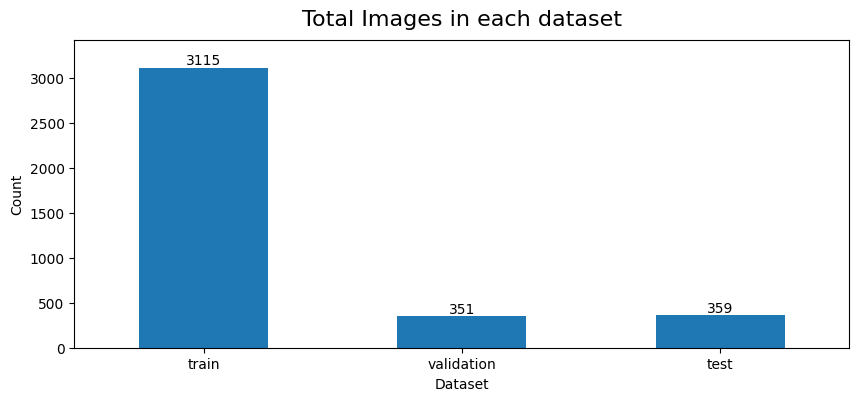

In [21]:
ax = folders_info_df[['train', 'validation', 'test']].T.sum(axis=1).plot(kind='bar', figsize=(10, 4))  
plt.xticks(rotation=0)
plt.title("Total Images in each dataset", fontsize = 16, y = 1.02)
plt.xlabel("Dataset")
plt.ylabel("Count")
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width() / 2, patch.get_height()), ha='center', va='bottom')

plt.margins(x = 0.02, y = 0.1)
plt.show()

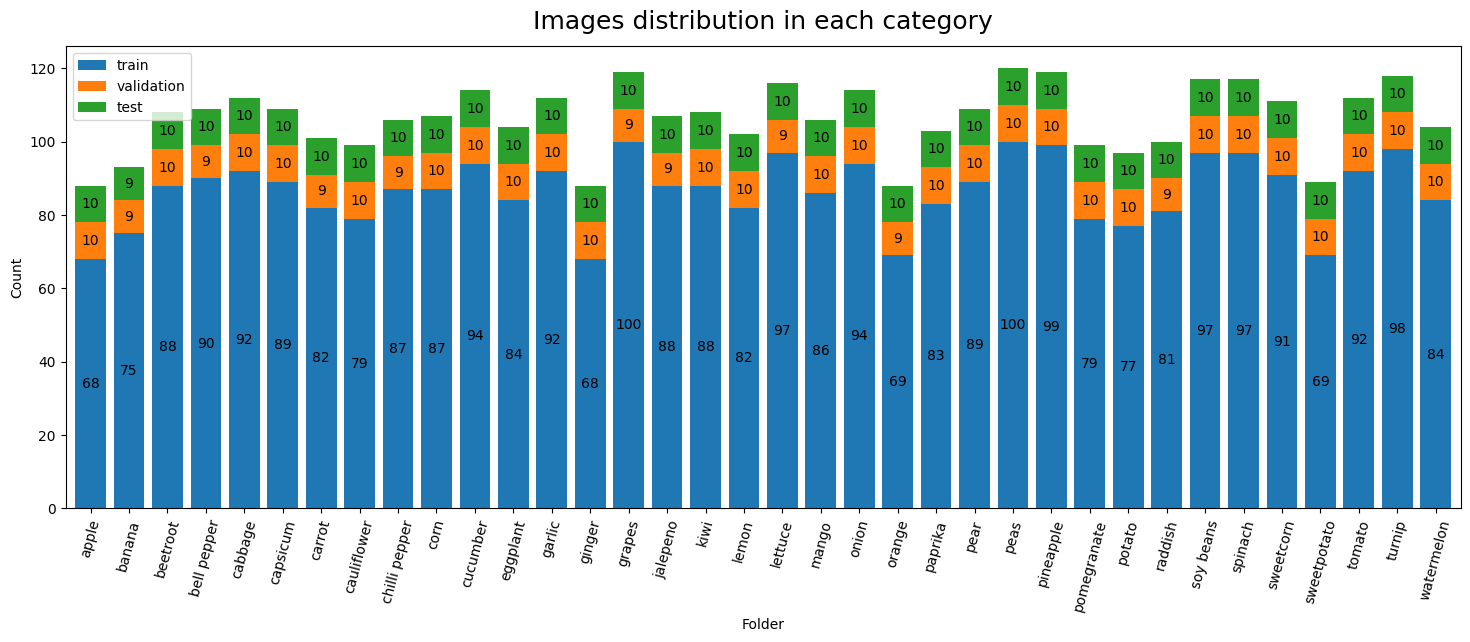

In [ ]:
ax = folders_info_df[['train', 'validation', 'test']].plot(kind='bar', stacked=True, figsize=(18, 6), width=0.8)
plt.title("Images distribution in each category", fontsize = 18, y = 1.02)
plt.xlabel("Folder")
plt.ylabel("Count")
plt.xticks(rotation=75)

for patch in ax.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy()
    ax.text(x + width/2, y + height/2, f"{height:.0f}", ha='center', va='center')